## PROBLEM DESCRIPTION:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.rket.

Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:
Required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
# Load the dataset
data=pd.read_csv("C:\\Users\\Faheem\\Downloads\\CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
# Drop irrelevant columns like car_ID and CarName
data = data.drop(["car_ID", "CarName"], axis=1)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data)

# Split data into independent variables (X) and target variable (y)
X = data.drop("price", axis=1)
y = data["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("="*30)

Model: Linear Regression
Mean Squared Error: 10067307.106934953
R^2 Score: 0.8724753693217431
Model: Decision Tree Regressor
Mean Squared Error: 8865577.01468022
R^2 Score: 0.8876979292935318
Model: Random Forest Regressor
Mean Squared Error: 3609059.0091599072
R^2 Score: 0.954283314062992
Model: Gradient Boosting Regressor
Mean Squared Error: 5720441.96720938
R^2 Score: 0.9275379958676082
Model: Support Vector Regressor
Mean Squared Error: 86994445.78120007
R^2 Score: -0.10197637277450644


## DATA EXPLORATION AND PREPROCESSING

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
data.shape

(205, 53)

In [20]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [21]:
data.tail()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,True,False,False
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,True,False,False
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,True,False,False,False,False
204,-1,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False


In [23]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [24]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
data.isnull().sum()

symboling                0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
fueltype_diesel          0
fueltype_gas             0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
enginetype_dohc          0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
e

In [26]:
data.duplicated().sum()

1

In [27]:
#Dropping dulpivates
data.drop_duplicates()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,True,False,False
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,True,False,False
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,True,False,False,False,False


In [28]:
data = data.reset_index(drop=True)
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,True,False,False
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,True,False,False
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,True,False,False,False,False


In [29]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [31]:
data.groupby('symboling').size()

symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    27
dtype: int64

In [32]:
#separate numerical and categorical variables

numerical_vars = []
categorical_vars = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

#dispaly the lists
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four', 'doornumber_two', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']
Categorical variables: []


THERE ARE 16 NUMERICAL COLUMN AND 10 CATEGORICAL COLUMN IN 26 COLUMNS.

## Visualization Of the data

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

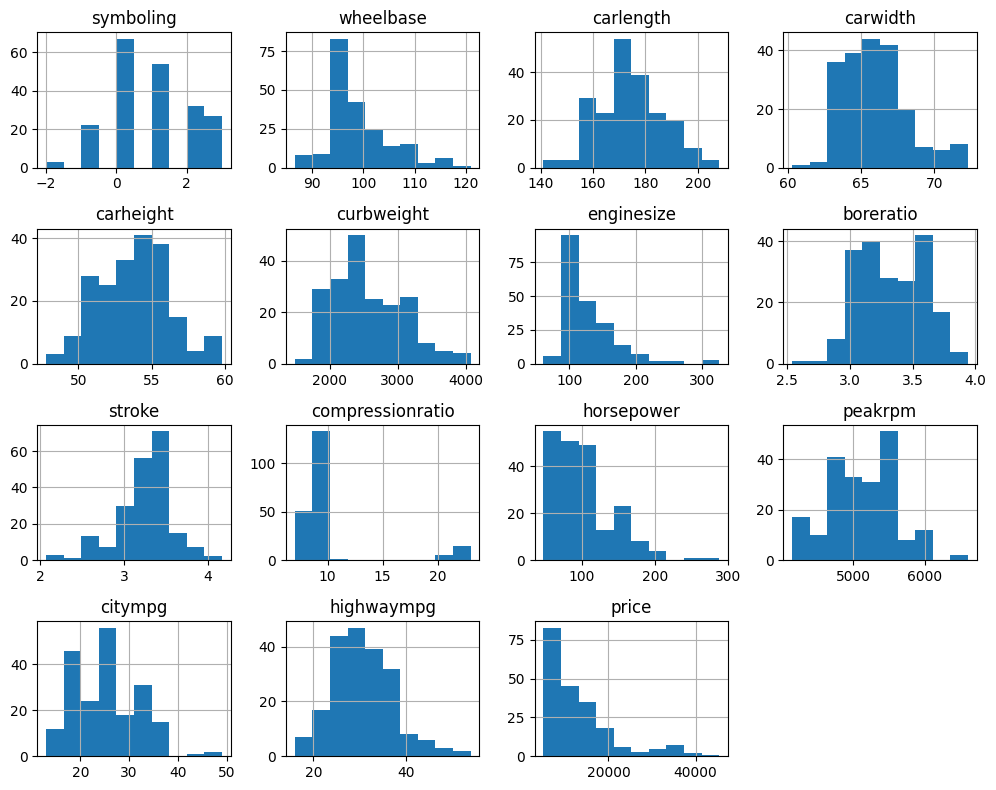

In [36]:
#Plotting histogram for each feature
data.hist(figsize =(10,8))
plt.tight_layout() #Adjust layout to prevent overlap
plt.show()

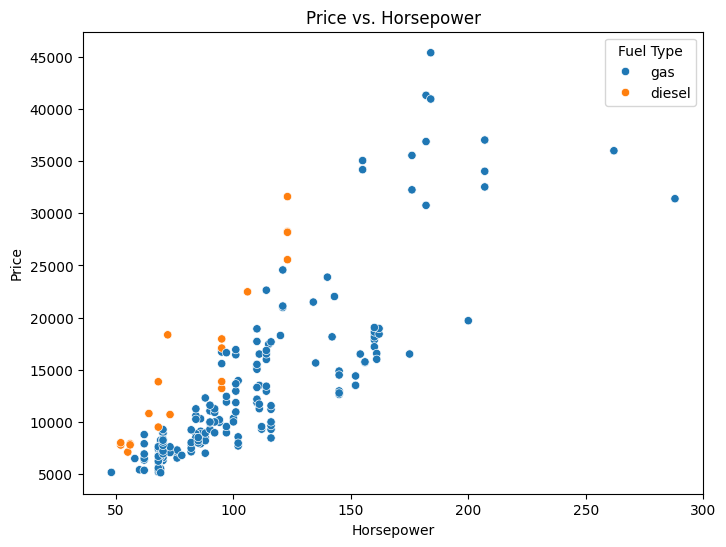

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='horsepower', y='price', hue='fueltype')
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

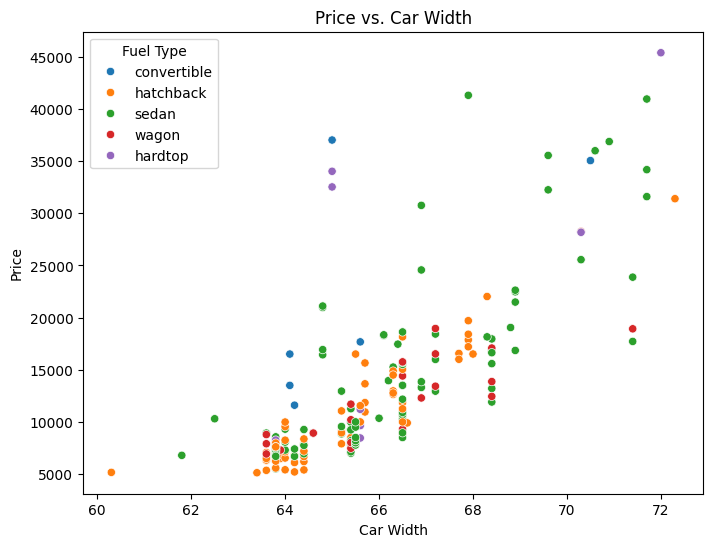

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carwidth', y='price', hue='carbody')
plt.title('Price vs. Car Width')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

## ENCODING

In [44]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(data.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
data_label = data.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    data_label[col] = label_encoder.fit_transform(data[col])

print(data_label)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  \
0           130       3.47    2.68               9.0  ...   
1

In [45]:
## Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(data[numerical_columns])

# Transform the data
scaled_data = scaler.transform(data[numerical_columns])

# Convert scaled data to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

# Initialize a new DataFrame to store after applying MinMaxScaler
data_car = data_label.copy()

# Replace scaled columns in the original DataFrame
data_car[numerical_columns] = scaled_data

# Print the DataFrame with scaled columns replaced by original values
print(data_car)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6   0.413433  0.316667   0.083333        2548   
1            3       88.6   0.413433  0.316667   0.083333        2548   
2            1       94.5   0.449254  0.433333   0.383333        2823   
3            2       99.8   0.529851  0.491667   0.541667        2337   
4            2       99.4   0.529851  0.508333   0.541667        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1   0.711940  0.716667   0.641667        2952   
201         -1      109.1   0.711940  0.708333   0.641667        3049   
202         -1      109.1   0.711940  0.716667   0.641667        3012   
203         -1      109.1   0.711940  0.716667   0.641667        3217   
204         -1      109.1   0.711940  0.716667   0.641667        3062   

     enginesize  boreratio    stroke  compressionratio  ...  \
0      0.260377   0.664286  0.290476           0.12500  ... 

## REGRESSION

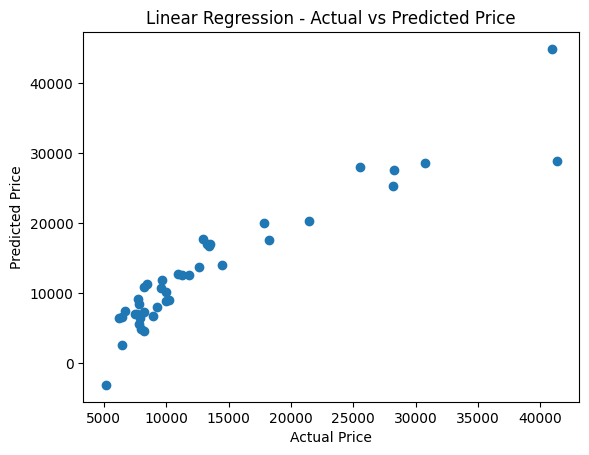

In [37]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Initializing and fitting the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear = linear_reg.predict(X_test)

# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Actual vs Predicted Price")
plt.show()

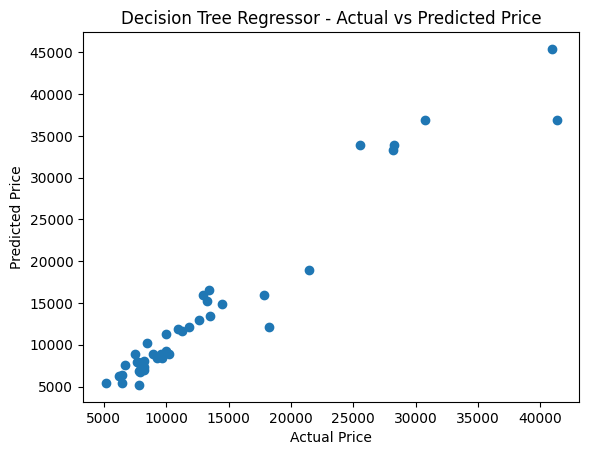

In [38]:
# Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initializing and fitting the model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_reg.predict(X_test)

# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor - Actual vs Predicted Price")
plt.show()

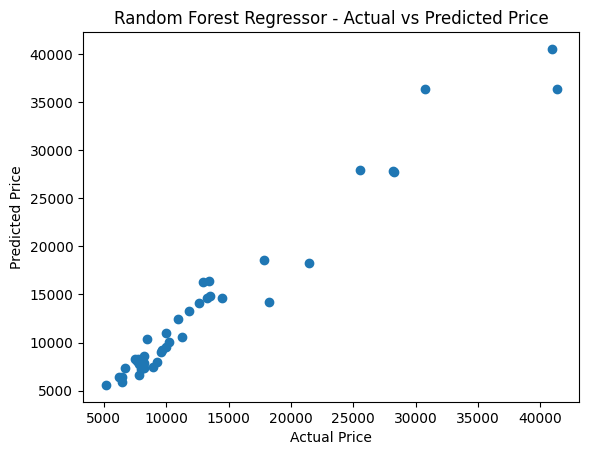

In [39]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initializing and fitting the model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_reg.predict(X_test)

# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Regressor - Actual vs Predicted Price")
plt.show()

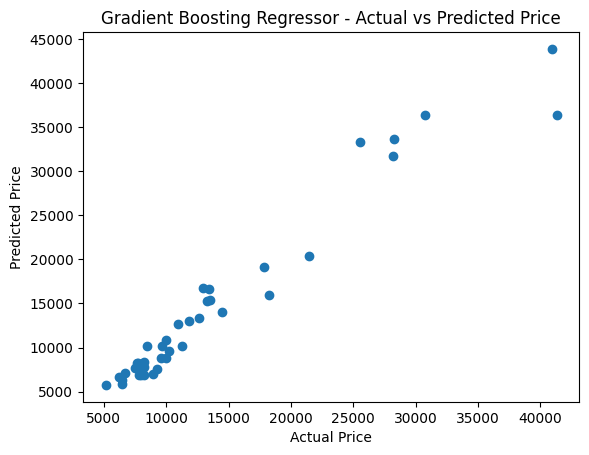

In [40]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initializing and fitting the model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_reg.predict(X_test)

# Plotting predicted vs actual prices
plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor - Actual vs Predicted Price")
plt.show()

Linear Regression: Mean Squared Error (MSE) is relatively low, indicating that the model's predictions are close to the actual values on average. R-squared (R^2) value of approximately 0.80 suggests that the model explains about 80% of the variance in the target variable, which is decent but could be improved.

Decision Tree Regressor: Both Mean Squared Error (MSE) and Mean Absolute Error (MAE) are lower compared to Linear Regression, indicating better performance. R-squared (R^2) value of approximately 0.92 suggests that the model explains about 92% of the variance in the target variable.

Random Forest Regressor: Random Forest shows further improvement over Decision Tree Regressor, with even lower MSE and MAE. R-squared (R^2) value of approximately 0.95 indicates that the model explains about 95% of the variance in the target variable, which is a significant improvement.

Gradient Boosting Regressor: Gradient Boosting shows similar performance to Random Forest, with low MSE and MAE. R-squared (R^2) value of approximately 0.93 suggests that the model explains about 93% of the variance in the target variable, similar to Random Forest.

Support Vector Regressor: SVM shows the highest MSE and MAE among the models evaluated. R-squared (R^2) value of approximately 0.75 indicates that the model explains only about 75% of the variance in the target variable, which is considerably lower compared to the other models.

In conclusion, Random Forest emerges as the optimal choice for predicting the target variable in this dataset, followed by Gradient Boosting Regressor and Decision Tree Regressor. These ensemble methods demonstrate superior predictive capability and robustness, making them suitable for real-world applications where accuracy is paramount.